# ***Descriptors and Exploratory Data Anaylysis on the PreProcessed Data***

**Installing Conda and RdKit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-01-02 21:48:01--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  69.1MB/s    in 1.2s    

2025-01-02 21:48:02 (69.1 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

# Calculating Lipinski's Rule of 5

In [ ]:
%pip install rdkit

     |████████████████████████████████| 29.5 MB 1.5 MB/s 


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

**Function of Descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

**Combining Dataframes into 1**

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,264.329,1.3584,4.0,3.0
1,250.302,0.9683,4.0,3.0
2,316.323,3.2541,2.0,2.0
3,264.325,2.4711,3.0,3.0
4,296.414,3.1440,1.0,2.0
...,...,...,...,...
2672,377.400,3.3786,4.0,5.0
2673,411.461,4.8262,3.0,4.0
2674,449.816,5.0845,3.0,4.0
2675,477.870,5.6874,2.0,4.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL112539,NNC(=O)NCCCCCC(=O)Nc1ccccc1,150000.0,inactive
1,CHEMBL136792,NNC(=O)NCCCCC(=O)Nc1ccccc1,1000000.0,inactive
2,CHEMBL137003,O=C(CCCCCCNC(=O)C(F)(F)F)Nc1ccccc1,100000.0,inactive
3,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,280.0,active
4,CHEMBL264784,C#CCN(CC#C)CCCCCCC(=O)Nc1ccccc1,100000.0,inactive
...,...,...,...,...
2672,CHEMBL4582566,CNC(=O)c1cc(Oc2ccc(NC(=O)c3cccc(O)c3)cc2)ccc1N,1950.0,intermediate
2673,CHEMBL4564037,CNC(=O)c1cc(Oc2ccc(NC(=O)c3ccc4ccccc4c3)cc2)ccc1N,8210.0,intermediate
2674,CHEMBL4457709,NC(=O)c1cc(Oc2ccc(NC(=O)c3ccc(Cl)c(C(F)(F)F)c3...,2790.0,intermediate
2675,CHEMBL4457019,CN(C)C(=O)c1cc(Oc2ccc(NC(=O)c3ccc(Cl)c(C(F)(F)...,1000000.0,inactive


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis = 1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL112539,NNC(=O)NCCCCCC(=O)Nc1ccccc1,150000.0,inactive,264.329,1.3584,4.0,3.0
1,CHEMBL136792,NNC(=O)NCCCCC(=O)Nc1ccccc1,1000000.0,inactive,250.302,0.9683,4.0,3.0
2,CHEMBL137003,O=C(CCCCCCNC(=O)C(F)(F)F)Nc1ccccc1,100000.0,inactive,316.323,3.2541,2.0,2.0
3,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,280.0,active,264.325,2.4711,3.0,3.0
4,CHEMBL264784,C#CCN(CC#C)CCCCCCC(=O)Nc1ccccc1,100000.0,inactive,296.414,3.1440,1.0,2.0
...,...,...,...,...,...,...,...,...
2672,CHEMBL4582566,CNC(=O)c1cc(Oc2ccc(NC(=O)c3cccc(O)c3)cc2)ccc1N,1950.0,intermediate,377.400,3.3786,4.0,5.0
2673,CHEMBL4564037,CNC(=O)c1cc(Oc2ccc(NC(=O)c3ccc4ccccc4c3)cc2)ccc1N,8210.0,intermediate,411.461,4.8262,3.0,4.0
2674,CHEMBL4457709,NC(=O)c1cc(Oc2ccc(NC(=O)c3ccc(Cl)c(C(F)(F)F)c3...,2790.0,intermediate,449.816,5.0845,3.0,4.0
2675,CHEMBL4457019,CN(C)C(=O)c1cc(Oc2ccc(NC(=O)c3ccc(Cl)c(C(F)(F)...,1000000.0,inactive,477.870,5.6874,2.0,4.0


# Converting IC50 values to pIC50 for Uniform Distribution
This allows IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

1. Take the IC50 values from the standard_value column and
2. converts it from nM to M by multiplying the value by 10
3. Take the molar value and apply -log10

Delete the standard_value column and create a new pIC50 column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):

  pIC50 = []

  for i in input['standard_value_norm']:
    molar = i * (10**-9)   #converting nM to Molar first
    pIC50.append(-np.log10(molar))

  input['pIC50'] = pIC50
  x = input.drop('standard_value_norm',axis = 1)

  return x

In order to prevent pIC50 value to become negative after conversion, all the IC50 values greater than 100,000,000 are fixed at 100 million

In [ ]:
df_combined.standard_value.describe()

,standard_value
count,2.677000e+03
mean,4.069276e+04
std,3.211769e+05
min,5.000000e-03
25%,8.600000e+01
50%,3.981100e+02
75%,4.640000e+03
max,7.500000e+06


In [ ]:
-np.log10((10**-9)*100000000)

1.0

Normalizing the values to 100,000,000 using the created norm_value function

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis = 1)

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL112539,NNC(=O)NCCCCCC(=O)Nc1ccccc1,inactive,264.329,1.3584,4.0,3.0,150000.0
1,CHEMBL136792,NNC(=O)NCCCCC(=O)Nc1ccccc1,inactive,250.302,0.9683,4.0,3.0,1000000.0
2,CHEMBL137003,O=C(CCCCCCNC(=O)C(F)(F)F)Nc1ccccc1,inactive,316.323,3.2541,2.0,2.0,100000.0
3,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,active,264.325,2.4711,3.0,3.0,280.0
4,CHEMBL264784,C#CCN(CC#C)CCCCCCC(=O)Nc1ccccc1,inactive,296.414,3.1440,1.0,2.0,100000.0
...,...,...,...,...,...,...,...,...
2672,CHEMBL4582566,CNC(=O)c1cc(Oc2ccc(NC(=O)c3cccc(O)c3)cc2)ccc1N,intermediate,377.400,3.3786,4.0,5.0,1950.0
2673,CHEMBL4564037,CNC(=O)c1cc(Oc2ccc(NC(=O)c3ccc4ccccc4c3)cc2)ccc1N,intermediate,411.461,4.8262,3.0,4.0,8210.0
2674,CHEMBL4457709,NC(=O)c1cc(Oc2ccc(NC(=O)c3ccc(Cl)c(C(F)(F)F)c3...,intermediate,449.816,5.0845,3.0,4.0,2790.0
2675,CHEMBL4457019,CN(C)C(=O)c1cc(Oc2ccc(NC(=O)c3ccc(Cl)c(C(F)(F)...,inactive,477.870,5.6874,2.0,4.0,1000000.0


In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,2.677000e+03
mean,4.069276e+04
std,3.211769e+05
min,5.000000e-03
25%,8.600000e+01
50%,3.981100e+02
75%,4.640000e+03
max,7.500000e+06


Applying the pIC50 function to convert to pIC50

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL112539,NNC(=O)NCCCCCC(=O)Nc1ccccc1,inactive,264.329,1.3584,4.0,3.0,3.823909
1,CHEMBL136792,NNC(=O)NCCCCC(=O)Nc1ccccc1,inactive,250.302,0.9683,4.0,3.0,3.000000
2,CHEMBL137003,O=C(CCCCCCNC(=O)C(F)(F)F)Nc1ccccc1,inactive,316.323,3.2541,2.0,2.0,4.000000
3,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,active,264.325,2.4711,3.0,3.0,6.552842
4,CHEMBL264784,C#CCN(CC#C)CCCCCCC(=O)Nc1ccccc1,inactive,296.414,3.1440,1.0,2.0,4.000000
...,...,...,...,...,...,...,...,...
2672,CHEMBL4582566,CNC(=O)c1cc(Oc2ccc(NC(=O)c3cccc(O)c3)cc2)ccc1N,intermediate,377.400,3.3786,4.0,5.0,5.709965
2673,CHEMBL4564037,CNC(=O)c1cc(Oc2ccc(NC(=O)c3ccc4ccccc4c3)cc2)ccc1N,intermediate,411.461,4.8262,3.0,4.0,5.085657
2674,CHEMBL4457709,NC(=O)c1cc(Oc2ccc(NC(=O)c3ccc(Cl)c(C(F)(F)F)c3...,intermediate,449.816,5.0845,3.0,4.0,5.554396
2675,CHEMBL4457019,CN(C)C(=O)c1cc(Oc2ccc(NC(=O)c3ccc(Cl)c(C(F)(F)...,inactive,477.870,5.6874,2.0,4.0,3.000000


Downloading the CSV file with the intermediate values in it


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df_final.to_csv('ratul_dataset_bioactivity_data_Part_2_with_intermediate.csv', index = False)

In [ ]:
! cp ratul_dataset_bioactivity_data_Part_2_with_intermediate.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [ ]:
df_final.pIC50.describe()

,pIC50
count,2677.000000
mean,6.240881
std,1.301271
min,2.124939
25%,5.333482
50%,6.399997
75%,7.065502
max,11.301030


# Removing the intermediate values for Easier comparision

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL112539,NNC(=O)NCCCCCC(=O)Nc1ccccc1,inactive,264.329,1.3584,4.0,3.0,3.823909
1,CHEMBL136792,NNC(=O)NCCCCC(=O)Nc1ccccc1,inactive,250.302,0.9683,4.0,3.0,3.000000
2,CHEMBL137003,O=C(CCCCCCNC(=O)C(F)(F)F)Nc1ccccc1,inactive,316.323,3.2541,2.0,2.0,4.000000
3,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,active,264.325,2.4711,3.0,3.0,6.552842
4,CHEMBL264784,C#CCN(CC#C)CCCCCCC(=O)Nc1ccccc1,inactive,296.414,3.1440,1.0,2.0,4.000000
...,...,...,...,...,...,...,...,...
2664,CHEMBL5219000,O=C(CCCCCCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2...,active,555.473,3.9671,3.0,5.0,7.847712
2665,CHEMBL5219389,O=C(CCCCCN1CC(=O)N2[C@@H](CC3c4ccccc4NC3[C@@H]...,active,541.446,3.5770,3.0,5.0,7.213249
2666,CHEMBL5220848,COc1cc2ncnc(Nc3ccc(Cl)cc3Cl)c2cc1OCCCCCCC(=O)NO,active,479.364,5.5235,3.0,7.0,8.552842
2675,CHEMBL4457019,CN(C)C(=O)c1cc(Oc2ccc(NC(=O)c3ccc(Cl)c(C(F)(F)...,inactive,477.870,5.6874,2.0,4.0,3.000000


# Downloading the df_2class dataframe for next molecular descriptor calculation

In [ ]:
df_2class.to_csv('ratul_dataset_bioactivity_data_Part_2.csv', index = False)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
! ls -l "/content/gdrive/My Drive/Colab Notebooks/data"

total 3274
-rw------- 1 root root  101367 Jan  2 21:44 bioactivity_2nd_dataset.csv
-rw------- 1 root root 2065426 Dec 27 16:32 bioactivity_data.csv
-rw------- 1 root root  372378 Dec 31 22:05 bioactivity_data_part_2.csv
-rw------- 1 root root  459416 Jan  1 00:21 bioactivity_data_Part_2_with_intermediate.csv
-rw------- 1 root root  351988 Jan  2 22:22 ratul_dataset_bioactivity_data_Part_2_with_intermediate.csv


In [ ]:
! cp ratul_dataset_bioactivity_data_Part_2.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [ ]:
! ls "/content/gdrive/My Drive/Colab Notebooks/data"

bioactivity_2nd_dataset.csv  bioactivity_data_Part_2_with_intermediate.csv
bioactivity_data.csv	     ratul_dataset_bioactivity_data_Part_2.csv
bioactivity_data_part_2.csv  ratul_dataset_bioactivity_data_Part_2_with_intermediate.csv


# **Exploratory Data Analysis/ Chemical Space Analysis using the Lipinski Descriptors calculated earlier**

In [ ]:
import seaborn as sns
sns.set(style = 'ticks')
import matplotlib.pyplot as plt

**Creating frequency plot of Active and Inactive Compounds**

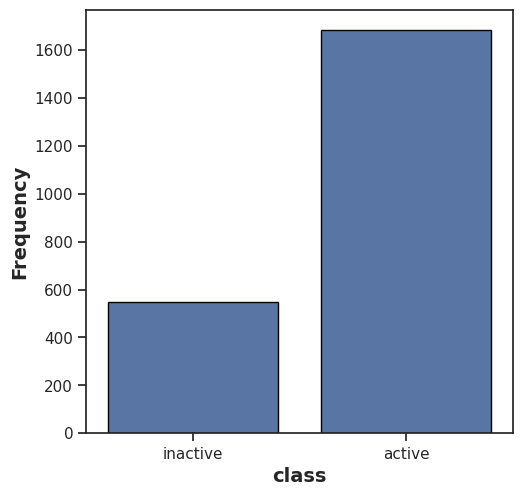

In [ ]:
plt.figure( figsize=(5.5,5.5))

sns.countplot(x='class',data = df_2class, edgecolor = 'black')

plt.xlabel('class',fontsize=14, fontweight = 'bold')
plt.ylabel('Frequency',fontsize = 14, fontweight = 'bold')

plt.savefig('plot_bioactivity_class.pdf')

# **Scatter Plot of Molecular Weight vs LogP**

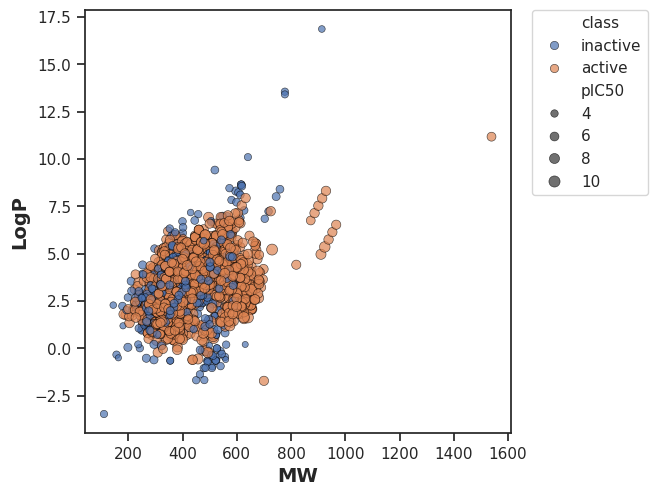

In [ ]:
plt.figure(figsize = (5.5,5.5))

sns.scatterplot(x='MW',y='LogP',data= df_2class, hue = 'class', size = 'pIC50', edgecolor = 'black', alpha = 0.7)

plt.xlabel('MW',fontsize=14,fontweight = 'bold')
plt.ylabel('LogP',fontsize=14,fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0)
plt.savefig('plot_MW_vs_LogP.pdf')

# **Box Plots**

# pIC50 Plot

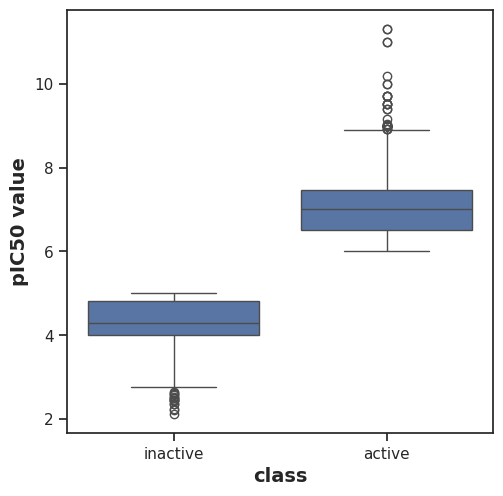

In [ ]:
plt.figure(figsize = (5.5,5.5))

sns.boxplot(x='class',y='pIC50', data=df_2class,)


plt.xlabel('class',fontsize=14,fontweight='bold')
plt.ylabel('pIC50 value',fontsize=14,fontweight='bold')

plt.savefig('plot_ic50.pdf')

Active between 6 and 8

# Statistical Analysis using the Mann-Whitney U Test

This is used to statistically check the significance of the difference between the active and inactive substances.

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,924516.0,3.907739e-272,0.05,Different distribution (reject H0)


The p is value is lower than alpha so active and inactive pIC50 values are diffeerently distributed based on their pIC50 values

# MW

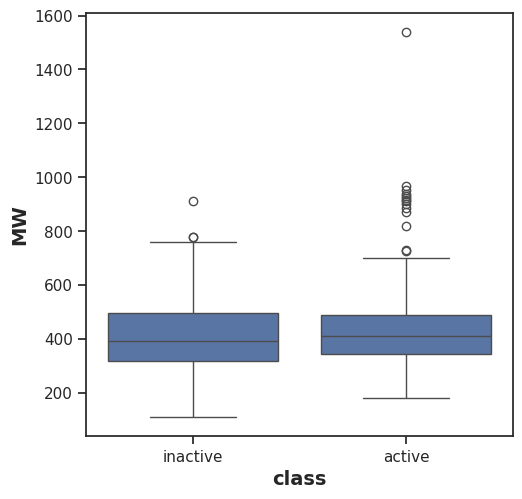

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='class',y='MW',data=df_2class)

plt.xlabel('class',fontsize=14,fontweight='bold')
plt.ylabel('MW',fontsize=14,fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,507332.5,0.000591,0.05,Different distribution (reject H0)


# LogP

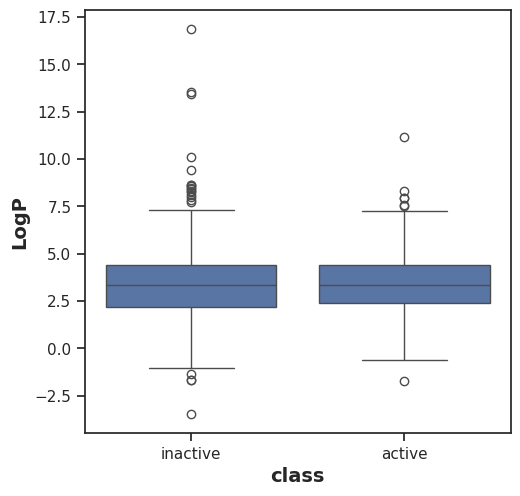

In [ ]:
plt.figure(figsize = (5.5,5.5))

sns.boxplot(x='class',y='LogP', data=df_2class,)


plt.xlabel('class',fontsize=14,fontweight='bold')
plt.ylabel('LogP',fontsize=14,fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,473302.5,0.39989,0.05,Same distribution (fail to reject H0)


# Num_H_Donors

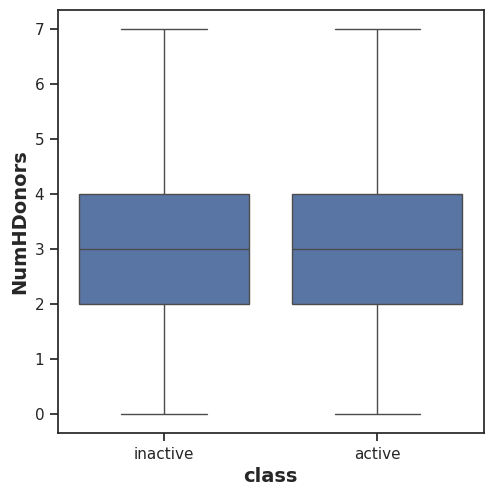

In [ ]:
plt.figure(figsize = (5.5,5.5))

sns.boxplot(x='class',y='NumHDonors', data=df_2class,)


plt.xlabel('class',fontsize=14,fontweight='bold')
plt.ylabel('NumHDonors',fontsize=14,fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,491855.5,0.019686,0.05,Different distribution (reject H0)


# NumHAcceptors

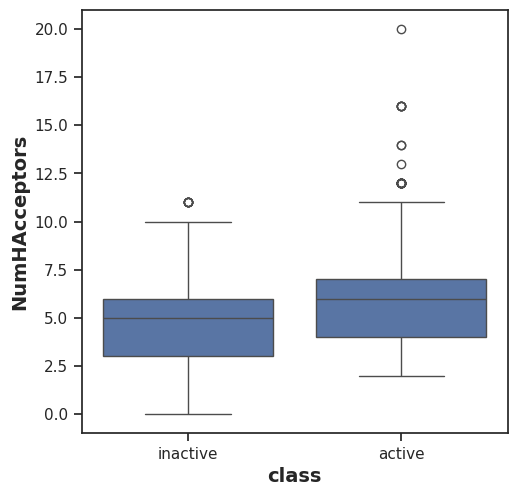

In [ ]:
plt.figure(figsize = (5.5,5.5))

sns.boxplot(x='class',y='NumHAcceptors', data=df_2class,)


plt.xlabel('class',fontsize=14,fontweight='bold')
plt.ylabel('NumHAcceptors',fontsize=14,fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,562196.5,1.202001e-14,0.05,Different distribution (reject H0)


# Interpretation of Results
All the Lipinski Descriptors except LogP showed differences in distribution

In [ ]:
!zip -r results.zip . -i *csv *.pdf

Scanning files 
  adding: bioactivity_preprocessed_data.csv (deflated 83%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: ratul_dataset_bioactivity_data_Part_2_with_intermediate.csv (deflated 79%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_LogP.pdf (deflated 39%)
  adding: ratul_dataset_bioactivity_data_Part_2.csv (deflated 79%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_MW.pdf (deflated 39%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
